![movie](images/director_shot.jpeg)

# Data Cleaning Notebook

This project analyzes IMDb movie data that includes title information, principal information and budget and grossing information about each film. This information is used to provide recommendations to the Microsoft movie studio regarding what types of films to make in its new studio.

In this notebook, we load the datasets, investigate the datasets to better understand the data, and clean some of the data. Then we merge some of the data sets to prepare to answer some of the intial questions we'd like to answer, leading to further data cleaning.


## Data Understanding

First, we are going to download movie databases from IMDb, Box Office Mojo, Rotten Tomatoes and TheMovieDB.org.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from glob import glob

In [3]:
csv_files = glob('data/zippedData/*.csv.gz')
csv_files

['data/zippedData\\bom.movie_gross.csv.gz',
 'data/zippedData\\imdb.name.basics.csv.gz',
 'data/zippedData\\imdb.title.akas.csv.gz',
 'data/zippedData\\imdb.title.basics.csv.gz',
 'data/zippedData\\imdb.title.crew.csv.gz',
 'data/zippedData\\imdb.title.principals.csv.gz',
 'data/zippedData\\imdb.title.ratings.csv.gz',
 'data/zippedData\\tmdb.movies.csv.gz',
 'data/zippedData\\tn.movie_budgets.csv.gz']

In [4]:
import os

In [5]:
csv_files_dict = {}
for filename in csv_files:
    clean_filename = os.path.basename(filename).replace('.csv', '').replace('.','_')
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[clean_filename] = filename_df

In [6]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [7]:
# load data into pandas DataFrames

gross_df = csv_files_dict['bom_movie_gross_gz']
names_df = csv_files_dict['imdb_name_basics_gz']
akas_df = csv_files_dict['imdb_title_akas_gz']
titles_df = csv_files_dict['imdb_title_basics_gz']
crews_df = csv_files_dict['imdb_title_crew_gz']
principals_df = csv_files_dict['imdb_title_principals_gz']
ratings_df = csv_files_dict['imdb_title_ratings_gz']
movies_df = csv_files_dict['tmdb_movies_gz']
budgets_df = csv_files_dict['tn_movie_budgets_gz']

We have now added all of the files in the dataset. Due to limitations and for the purpose of this project, we will only be using the following files:

- 'imdb_name_basics_gz'
- 'imdb_title_basics_gz'
- 'imdb_title_principals_gz'
- 'tn_movie_budgets_gz'

### Create functions for understanding the data

When investigating the dataset, these functions will allow us to more quickly check each DataFrame for any data that may need to be cleaned. Previewing each DataFrame can be used to create a diagram that keeps track of each DataFrame's columns and how they can be joined.


In [8]:
# function to return percentage of missing values in a DataFrame

def missing_values(df):
    return df.isna().sum()/len(df)

In [9]:
#function to return all duplicate values in a DataFrame

def check_duplicates(df):
    return df[df.duplicated(keep=False)]

In [10]:
# function to print the value counts of each column in a DataFrame

def col_counts(df):
    for col in df:
        print (f"Value counts from col: {col}")
        print(f"\n{df[col].value_counts(normalize=True)[:5]}")
        print("\n")

### Begin to understand each DataFrame

**titles_df**

In [11]:
titles_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In order to more easily work with the 'tconst' column, we may need to reset the index later.

In [12]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [13]:
missing_values(titles_df)

primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

It looks like there are a number of missing values for runtime_minutes. We may need to deal with these missing values later.

In [14]:
check_duplicates(titles_df)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt10013288,The Promise,The Promise,2017,NaN,Drama
tt10042440,Untitled Marvel Film,Untitled Marvel Film,2021,NaN,Action
tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
tt10064558,Untitled Marvel Film,Untitled Marvel Film,2021,NaN,Action
...,...,...,...,...,...
tt9660588,3. Elma,3. Elma,2014,65.0,Drama
tt9678524,Um fio de esperança: independência ou guerra n...,Um fio de esperança: independência ou guerra n...,2017,94.0,Documentary
tt9688944,Um fio de esperança: independência ou guerra n...,Um fio de esperança: independência ou guerra n...,2017,94.0,Documentary


It also looks like there are a number of duplicate entries, where the tconst key is different but all of the other information is the same. We will need to address this before beginning our analysis.

**budgets_df**

In [15]:
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


the id index for budgets_df only has values 1 to 82, so we will need to reset this index. The datatype of the dollar value columns are not stored as int or float, which is not helpful and will need to change.

In [17]:
missing_values(budgets_df)

release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [18]:
check_duplicates(budgets_df)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,


In [19]:
col_counts(budgets_df)

Value counts from col: release_date

Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2009    0.002248
Name: release_date, dtype: float64


Value counts from col: movie

Home          0.000519
Halloween     0.000519
King Kong     0.000519
Cinderella    0.000346
Cat People    0.000346
Name: movie, dtype: float64


Value counts from col: production_budget

$20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64


Value counts from col: domestic_gross

$0             0.094777
$8,000,000     0.001557
$2,000,000     0.001211
$7,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64


Value counts from col: worldwide_gross

$0             0.063473
$8,000,000     0.001557
$2,000,000     0.001038
$7,000,000     0.001038
$15,000,000    0.000692
Name: worldwide_gross, dtype: float64




At a glance, December 31st looks like a popular release date. Let's explore release dates later and see if there's a reason for that.

**names_df**

In [20]:
names_df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [21]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [22]:
missing_values(names_df)

primary_name          0.000000
birth_year            0.863618
death_year            0.988819
primary_profession    0.084629
known_for_titles      0.049788
dtype: float64

With so many missing values for 'birth_year' and 'death_year', we likely will not be using these columns.

**principals_df**

In [23]:
principals_df.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [24]:
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


In [25]:
missing_values(principals_df)

ordering      0.000000
nconst        0.000000
category      0.000000
job           0.827187
characters    0.617423
dtype: float64

83% of rows are missing values for job and 62% are missing for characters. We will likely end up dropping these columns later.

In [26]:
col_counts(principals_df)

Value counts from col: ordering

1    0.139521
2    0.130958
3    0.123069
4    0.114546
5    0.105878
Name: ordering, dtype: float64


Value counts from col: nconst

nm1930572    0.000368
nm0000636    0.000156
nm0000616    0.000144
nm0103977    0.000123
nm4394575    0.000100
Name: nconst, dtype: float64


Value counts from col: category

actor              0.249681
director           0.142380
actress            0.142200
producer           0.110606
cinematographer    0.077895
Name: category, dtype: float64


Value counts from col: job

producer                   0.608766
screenplay                 0.045992
director of photography    0.036677
writer                     0.036464
co-director                0.032620
Name: job, dtype: float64


Value counts from col: characters

["Himself"]     0.110799
["Herself"]     0.040998
["Narrator"]    0.005639
["Alex"]        0.001668
["David"]       0.001576
Name: characters, dtype: float64




According to the value counts from the category column, the second highest amount of values are for directors. This should be a useful subset of the data that we can explore later.

## Data Cleaning

Now, let's begin cleaning some of the data we noticed when initially exploring the data, preparing it to be analyzed.

### titles_df

Since we found a number of duplicates in the title_df, let's drop any duplicates on primary_title and start_year, as that is highly likely to be a mistake.

In [27]:
titles_df = titles_df.drop_duplicates(subset=['primary_title', 'start_year'])
check_duplicates(titles_df)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,


We saw above the column 'tconst' was set as the index of titles_df. Let's reset the index so we can more easily access this column.

In [28]:
#reset the titles_df index and check the change.
titles_df.reset_index(inplace=True)
titles_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### budgets_df

The budget and gross numbers in budget_df need to be converted from strings to integers. we need to replace the $ and commas in order to properly covert these values to numbers.

In [29]:
#create a function to convert columns in dollars to float values.

def convert_dol_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [30]:
# create a list of the columns that need to be changed, then use a for loop so only these columns in budgets_df are updated.
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    budgets_df = convert_dol_to_float(budgets_df, col)

In [31]:
# confirm the datatypes of these columns changed
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


Now, reset the index, as the id column isn't a true unique identifier.

In [32]:
# reset index

budgets_df.reset_index(inplace=True)
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


### names_df

We saw above there were very limited values in the 'birth_year' and 'death_year' columns. Let's drop these columns.

In [33]:
#drop columns with limited values
names_df.drop(columns = ['birth_year', 'death_year'], inplace=True)
names_df.head()

,primary_name,primary_profession,known_for_titles
nconst,,,
nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


### principals_df

Just like we did with the names_df, let's drop the 'job' and 'characters' columns as they don't look very helpful.

In [34]:
principals_df.drop(columns = ['job', 'characters'], inplace = True)
principals_df.head()

,ordering,nconst,category
tconst,,,
tt0111414,1,nm0246005,actor
tt0111414,2,nm0398271,director
tt0111414,3,nm3739909,producer
tt0323808,10,nm0059247,editor
tt0323808,1,nm3579312,actress


Let's also reset the index so we can use the 'tconst' column. There are duplicate values in the tconst column, so it doesn't make a great key.

In [35]:
principals_df.reset_index(inplace=True)

## Merging Datasets and Feature Engineering

### title_df and budgets_df merge

We are interested in exploring how the return on investment of a movie is related to its genre or the time of year it is released. To explore this, we need to join title_df and budget_df.

In [36]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144072 entries, 0 to 144071
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           144072 non-null  object 
 1   primary_title    144072 non-null  object 
 2   original_title   144054 non-null  object 
 3   start_year       144072 non-null  int64  
 4   runtime_minutes  112854 non-null  float64
 5   genres           138880 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.6+ MB


In [37]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Since there are far fewer rows in budgets_df, let's use that as our left table. Since we aren't joining these DataFrames on indexes, we will use the .merge method.

In [38]:
title_budgets_df = budgets_df.merge(titles_df, how='left',
                                   left_on = 'movie', right_on = 'primary_title')
title_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6850,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
6851,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN,NaN,NaN,NaN
6852,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN,NaN,NaN,NaN
6853,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


In [39]:
missing_values(title_budgets_df)

id                   0.000000
release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
tconst               0.496864
primary_title        0.496864
original_title       0.497009
start_year           0.496864
runtime_minutes      0.556090
genres               0.503866
dtype: float64

Since we are interested in genres, we need to drop any rows that are missing these values.

In [40]:
# drop rows with missing values in column 'genres', 'runtime_minutes'. Recheck for missing values.

title_budgets_df.dropna(subset=['genres'], inplace=True)
missing_values(title_budgets_df)

id                   0.000000
release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
tconst               0.000000
primary_title        0.000000
original_title       0.000000
start_year           0.000000
runtime_minutes      0.109674
genres               0.000000
dtype: float64

**Additional columns**

In order to calculate Return on Investment (ROI), we will need to add a new column. We will calculate ROI by subtracting production_budget from worldwide_gross, then dividing by production_budget, and multiplying by 100 to get the percentage. We should be ready to calculate this new column since we converted the values in these columns to float.

In [41]:
# Adding a column to calculate ROI.
title_budgets_df['ROI'] = (title_budgets_df['worldwide_gross'] - title_budgets_df['production_budget']) / title_budgets_df['production_budget']*100
title_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",324.384139
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",582.711400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,67,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017.0,70.0,"Comedy,Drama,Horror",1287.110000
6839,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011.0,93.0,Drama,845.960000
6845,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",-49.066667
6850,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",-100.000000


We also noticed our genre column often lists multiple genres for a single movie. We need to get the genre into a single category to simplify our data analysis. For these purposes, we are assuming the first listed genre is the movie's primary genre.

In [42]:
#split genre column into a new column, where each genre is an item in a list.

title_budgets_df['genres_split'] = title_budgets_df['genres'].map(lambda x: x.split(',') if x else x)

In [43]:
#create a new column called 'primary_genre' by accessing the first item in the 'genres_split' column.

title_budgets_df['primary_genre'] = title_budgets_df['genres_split'].map(lambda x: x[0])
title_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ROI,genres_split,primary_genre
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,553.257713,[Horror],Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",154.667286,"[Action, Adventure, Fantasy]",Action
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",-57.210757,"[Action, Adventure, Sci-Fi]",Action
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",324.384139,"[Action, Adventure, Sci-Fi]",Action
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",582.711400,"[Action, Adventure, Sci-Fi]",Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,67,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017.0,70.0,"Comedy,Drama,Horror",1287.110000,"[Comedy, Drama, Horror]",Comedy
6839,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011.0,93.0,Drama,845.960000,[Drama],Drama
6845,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",-49.066667,"[Comedy, Drama]",Comedy
6850,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",-100.000000,"[Horror, Sci-Fi, Thriller]",Horror


We are also interested in knowing how release dates affect a movie's profitability. We can break out the 'release_date' column and create columns for 'release_month' and 'release_year'.

In [44]:
title_budgets_df['release_month'] = title_budgets_df['release_date'].map(lambda x: x.split()[0])
title_budgets_df['release_month'] 

0       Dec
1       May
2       Jun
3       May
6       Apr
       ... 
6838    Apr
6839    Jul
6845    Jan
6850    Dec
6853    Sep
Name: release_month, Length: 3401, dtype: object

In [45]:
title_budgets_df['release_year'] = title_budgets_df['release_date'].map(lambda x: x.split()[2])
title_budgets_df['release_year'] 

0       2009
1       2011
2       2019
3       2015
6       2018
        ... 
6838    2006
6839    2001
6845    2012
6850    2018
6853    2015
Name: release_year, Length: 3401, dtype: object

In [46]:
## change the datatype of release_year to int.

title_budgets_df['release_year'] = title_budgets_df['release_year'].astype(int)
title_budgets_df['release_year']

0       2009
1       2011
2       2019
3       2015
6       2018
        ... 
6838    2006
6839    2001
6845    2012
6850    2018
6853    2015
Name: release_year, Length: 3401, dtype: int32

In [47]:
title_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ROI,genres_split,primary_genre,release_month,release_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,553.257713,[Horror],Horror,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",154.667286,"[Action, Adventure, Fantasy]",Action,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",-57.210757,"[Action, Adventure, Sci-Fi]",Action,Jun,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",324.384139,"[Action, Adventure, Sci-Fi]",Action,May,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",582.711400,"[Action, Adventure, Sci-Fi]",Action,Apr,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,67,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017.0,70.0,"Comedy,Drama,Horror",1287.110000,"[Comedy, Drama, Horror]",Comedy,Apr,2006
6839,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011.0,93.0,Drama,845.960000,[Drama],Drama,Jul,2001
6845,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",-49.066667,"[Comedy, Drama]",Comedy,Jan,2012
6850,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",-100.000000,"[Horror, Sci-Fi, Thriller]",Horror,Dec,2018


This DataFrame is nearly ready to be exported as a csv. Let's just do some quick final clean ups of columns.

In [48]:
## delete unnecessary columns

title_budgets_df.drop(columns=['id','primary_title', 'original_title', 'start_year', 'genres_split'], inplace=True)
title_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018


In [49]:
# remove any duplicates on release_date and movie.

title_budgets_df = title_budgets_df.drop_duplicates(subset=['release_date', 'movie'])

Out of curiosity, let's see what the distribution is of release_year, so we can see what time period we will be working with. Then we will save down the clean DataFrame as a csv file to use in our data analysis notebook.

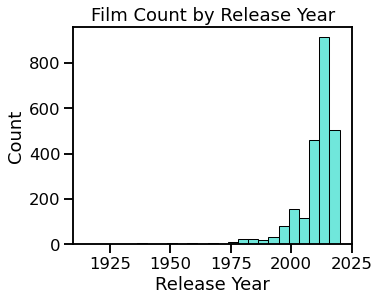

In [50]:
sns.set_context('talk')
plt.figure(figsize=(5,4))
ax = sns.histplot(data = title_budgets_df, x = 'release_year', bins=25, color='turquoise')
ax.set_title('Film Count by Release Year')
ax.set_xlabel('Release Year')
plt.savefig("images/year_frequency");

In [51]:
# export the dataframe as a csv file to be loaded into our analysis notebook.

title_budgets_df.to_csv('./data/cleaned_title_budgets_df.csv')

### names_df and principals_df merge

We are also interested in learning more about the directors of a movie and how that affects a movie's profitability. Since the principals_df, which contains the information for directors, does not include actual names, we will need to merge with the names_df in order to get names of any directors.

In [52]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   primary_name        606648 non-null  object
 1   primary_profession  555308 non-null  object
 2   known_for_titles    576444 non-null  object
dtypes: object(3)
memory usage: 18.5+ MB


In [53]:
names_df.reset_index(inplace=True)
names_df

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...
606643,nm9990381,Susan Grobes,actress,NaN
606644,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,producer,NaN


In [54]:
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tconst    1028186 non-null  object
 1   ordering  1028186 non-null  int64 
 2   nconst    1028186 non-null  object
 3   category  1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


In [55]:
principals_names_df = names_df.merge(principals_df, left_on=['nconst'], right_on=['nconst'], how ='left')
principals_names_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9.0,producer
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,7.0,composer
2,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,8.0,composer
3,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,8.0,composer
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,7.0,composer
...,...,...,...,...,...,...,...
1030265,nm9990381,Susan Grobes,actress,NaN,tt6527982,2.0,actress
1030266,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130",tt8737130,4.0,actress
1030267,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610",tt8734436,3.0,actress
1030268,nm9991786,Michelle Modigliani,producer,NaN,tt8739240,9.0,producer


Since we are interested in directors for our analysis, let's create a new dataframe containing just the information for directors.

In [56]:
directors_df = principals_names_df.loc[principals_names_df['category']=='director']
directors_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category
12,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5.0,director
13,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5.0,director
14,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,5.0,director
15,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,5.0,director
48,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,2.0,director
...,...,...,...,...,...,...,...
1030239,nm9971456,Zheng Wei,director,NaN,tt8697720,1.0,director
1030247,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,5.0,director
1030248,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,5.0,director
1030249,nm9981679,Samir Eshra,"director,writer,cinematographer",NaN,tt8717234,1.0,director


In [57]:
missing_values(directors_df)

nconst                0.000000
primary_name          0.000000
primary_profession    0.004010
known_for_titles      0.028717
tconst                0.000000
ordering              0.000000
category              0.000000
dtype: float64

In [58]:
# export the dataframe as a csv file to be loaded into our analysis notebook.

directors_df.to_csv('./data/cleaned_directors_df.csv')

We can later merge this data with our other cleaned up title_budgets_df in order to get run profitability analyses on directors.